In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from p2mpp.data.shapenet import ShapeNet

In [3]:
dataset = ShapeNet(
    file_list=r"C:\ORamaVR\Python\Pixel2MeshPlusPlusTorch\data\train_list.txt",
    data_root=r"C:\ORamaVR\Datasets\p2mppdata\p2mppdata\train",
    image_root=r"C:\ORamaVR\Datasets\ShapeNetRendering",
)

In [4]:
imgs, imgs_orig, points, normals, poses, filename = dataset[0].values()

In [5]:
from p2mpp.data.datamodule import DataModule

In [6]:
datamodule = DataModule(train_file_list=r"C:\ORamaVR\Python\Pixel2MeshPlusPlusTorch\data\train_list.txt",
                        test_file_list=r"C:\ORamaVR\Python\Pixel2MeshPlusPlusTorch\data\test_list.txt",
                        data_root=r"C:\ORamaVR\Datasets\p2mppdata\p2mppdata\train",
                        image_root=r"C:\ORamaVR\Datasets\ShapeNetRendering",
                        batch_size=8,
                        num_workers=1,
                        )


In [7]:
for batch in datamodule.train_dataloader():
    break

In [8]:
batch["points"].shape

torch.Size([8, 7273, 3])

In [9]:
batch["normals"].shape

torch.Size([8, 7273, 3])

In [10]:
batch["images"].shape

torch.Size([8, 3, 224, 224, 3])

In [11]:
from p2mpp.models.p2m import P2MModel, BaseMeshConfig

In [12]:
basemeshconfig = BaseMeshConfig("ellipsoid", mesh_pose=(0.0, 0.0, 0.0))

In [13]:
model = P2MModel(
    hidden_dim=192,
    last_hidden_dim=192,
    coord_dim=3,
    backbone="vgg16",
    gconv_activation=True,
    z_threshold=0,
    align_with_tensorflow=True,
    camera_c=(111.5, 111.5),
    camera_f=(248.0, 248.0),
    base_mesh_config=basemeshconfig
)

c:\oramavr\python\pixel2meshplusplustorch\p2mpp\models\mesh\ellipsoid.py:21: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:607.)
  return torch.sparse.FloatTensor(i, v, shape)


In [14]:
images = batch["images"]

In [15]:
images.dtype

torch.float64

In [16]:
poses = batch["poses"]

In [17]:
proj_layer = model.projection

In [18]:
images = images.float()

In [19]:
images.shape

torch.Size([8, 3, 224, 224, 3])

In [20]:
images = images.permute(0, 1, 4, 2, 3)
images.shape

torch.Size([8, 3, 3, 224, 224])

In [21]:
img_feats = [model.nn_encoder(images[:, i]) for i in range(images.shape[1])]

In [22]:
import numpy as np

output = proj_layer(
    resolution=np.array((224, 224)),
    img_features=img_feats,
    inputs=batch["points"],
    poses=batch["poses"],
)

In [23]:
poses = poses.float()

In [35]:
output = model(images, poses)

In [36]:
images.shape

torch.Size([8, 3, 3, 224, 224])

In [38]:
output["reconst"].shape

torch.Size([8, 3, 3, 224, 224])

In [ ]:
w = w_list[1][2]
h = h_list[1][2]

from PIL import Image, ImageDraw

# create a new image
img = Image.new('RGB', (224, 224), color='white')

# create a draw object
draw = ImageDraw.Draw(img)

# iterate over each h and w coordinate and draw a red dot
for i in range(len(h)):
    draw.ellipse((w[i]-1, h[i]-1, w[i]+1, h[i]+1), fill='red')

# display the image
img.show()


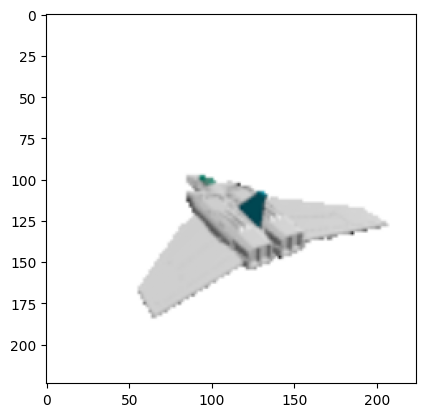

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(images[1,2].permute(1,2,0).numpy())
plt.show()


In [ ]:
images.shape

torch.Size([8, 3, 3, 224, 224])